Optimizing Eggholder function


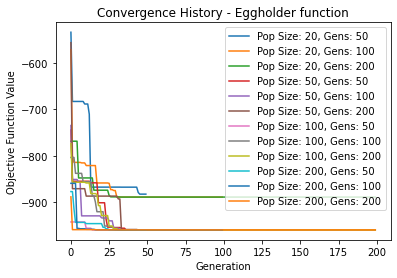


Best fitness for Eggholder function =  -959.2368488185547

Optimizing Holder Table function


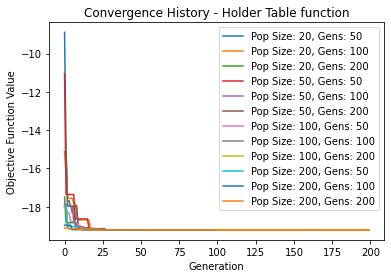


Best fitness for Holder Table function =  -19.2041838982953


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def eggholder(a, b):
    return -(b + 47) * np.sin(np.sqrt(np.abs(b + a/2 + 47))) - a * np.sin(np.sqrt(np.abs(a - (b + 47))))

def holder_table(a, b):
    t_1 = np.sin(a) * np.cos(b)
    t_2 = np.exp(np.abs(1 - np.sqrt(a*a + b*b) / np.pi))
    return -np.abs(t_1 * t_2)

# Defining the differential evolution optimization algorithm
def differential_evolution(obj_function, bounds, population_size, max_generations, crossover_prob, K):
    # Initializing population
    pop = np.random.uniform(bounds[0], bounds[1], (population_size, len(bounds)))

    # Initializing convergence history
    best_fitness = []
    average_fitness = []

    # Iterating through generations
    for gen in range(max_generations):
        best_fitness_gen = np.inf
        average_fitness_gen = 0

        # Iterating through individuals in the population
        for i in range(population_size):
            # Select three distinct individuals other than the current one
            indices = [idx for idx in range(population_size) if idx != i]
            x, y, z = pop[np.random.choice(indices, 3, replace=False)]

            
            mutant_vector = x + K * (y - z)   # Generating mutant vector

          
            trial = np.where(np.random.rand(len(bounds)) < crossover_prob, mutant_vector, pop[i])     # Applying crossover

            
            trial = np.clip(trial, bounds[0], bounds[1])   # Clipping trial vector to the bounds

            
            trial_fitness = obj_function(*trial)   # Evaluating the trial vector fitness
            current_fitness = obj_function(*pop[i])

           
            if trial_fitness < current_fitness:    # selection
                pop[i] = trial
                current_fitness = trial_fitness

            
            best_fitness_gen = min(best_fitness_gen, current_fitness)  # Updating the best and average fitness
            average_fitness_gen += current_fitness

        
        best_fitness.append(best_fitness_gen)  # Updating convergence history
        average_fitness.append(average_fitness_gen / population_size)

    return pop, best_fitness, average_fitness

eggholder_bounds = [-512, 512]
holdertable_bounds = [-10, 10]
population_sizes = [20, 50, 100, 200]
numof_gens = [50, 100, 200]
crossover_prob = 0.8
K = 0.5

#DE optimization for Eggholder function
print("Optimizing Eggholder function")
for pop_size in population_sizes:
    for max_gen in numof_gens:
        _, best_fitness, avg_fitness = differential_evolution(eggholder, eggholder_bounds, pop_size, max_gen, crossover_prob, K)
        plt.plot(best_fitness, label=f"Pop Size: {pop_size}, Gens: {max_gen}")

plt.title("Convergence History - Eggholder function")
plt.xlabel("Generation")
plt.ylabel("Objective Function Value")
plt.legend()
plt.show()
print("\n""Best fitness for Eggholder function = ", sum(best_fitness)/len(best_fitness))

#DE optimization for Holder Table function
print("\nOptimizing Holder Table function")
for pop_size in population_sizes:
    for max_gen in numof_gens:
        _, best_fitness, avg_fitness = differential_evolution(holder_table, holdertable_bounds, pop_size, max_gen, crossover_prob, K)
        plt.plot(best_fitness, label=f"Pop Size: {pop_size}, Gens: {max_gen}")

plt.title("Convergence History - Holder Table function")
plt.xlabel("Generation")
plt.ylabel("Objective Function Value")
plt.legend()
plt.show()
print("\n""Best fitness for Holder Table function = ", sum(best_fitness)/len(best_fitness))